# 数值分析 实验二
计63 陈晟祺 2016010981

## 上机题 2

### 实验概述

本实验要求实现阻尼牛顿法求解非线性方程，打印迭代过程，并与其他方法求得的解进行验证，并考虑使用与不使用阻尼的效果差别。

### 实验过程

首先实现阻尼牛顿法（其中阻尼根据需要选择打开），参数为函数、初始值，输出为求得的解。其中判断阈值（包括残差和误差阈值）选择为 $10^{-8}$，阻尼因子的初始值为 $\lambda_0=0.9$，每次阻尼因子减半。

In [1]:
import numpy as np
from mpmath import diff

def newton(f, x0, damp=False):
    eps = 1e-8
    k = 0 # iteration step
    l = 0.9 # initial damp
    x = last_x = x0
    while np.abs(f(x)) > eps or np.abs(x - last_x) > eps:
        s = f(x) / np.float64(diff(f, x))
        last_x = x
        x = last_x - s
        k += 1
        print('Step {:2d}: s = {:.7f}, x = {:.7f}, f(x) = {:.7f}'.format(k, s, x, f(x)))
        if damp:
            i = 0
            while np.abs(f(x)) > np.abs(f(last_x)):
                l_n = l * (0.5 ** i) # lambda_i = l * 2 ^ i
                x = last_x - l_n * s
                i += 1
                print('- Damp with factor {:.5f}, s = {:.7f}, x = {:.7f}, f(x) = {:.7f}'.format(l_n, l_n * s, x, f(x)))
    return x

定义函数对某个给定的函数进行求解，并与 `scipy.optimize.root` 求得的解进行比较：

In [2]:
from scipy.optimize import root

def test_newton(f, x0):
    print('Solving with basic Newton method')
    sol_newton = newton(f, x0)
    print('\nSolving with damping Newton method')
    sol_newton_damp = newton(f, x0, True)
    sol_root = root(f, x0).x[0]
    print('\nNewton: {:.4f}, Newton with damp: {:.4f}, SciPy: {:.4f}'.format(sol_newton, sol_newton_damp, sol_root))
    print('Newton error: {:.8%}, Newton with damp error: {:.8%}'.format((sol_newton - sol_root) / sol_root, (sol_newton_damp - sol_root) / sol_root))

首先对第一个方程，即 $f(x)=x^3-x-1,\,\,x_0=0.6$ 进行迭代求解：

In [3]:
test_newton(lambda x: x ** 3 - x - 1, 0.6)

Solving with basic Newton method
Step  1: s = -17.3000000, x = 17.9000000, f(x) = 5716.4390000
Step  2: s = 5.9531977, x = 11.9468023, f(x) = 1692.1735328
Step  3: s = 3.9612820, x = 7.9855204, f(x) = 500.2394160
Step  4: s = 2.6286110, x = 5.3569093, f(x) = 147.3675178
Step  5: s = 1.7319133, x = 3.6249960, f(x) = 43.0096132
Step  6: s = 1.1194068, x = 2.5055892, f(x) = 12.2244426
Step  7: s = 0.6854598, x = 1.8201294, f(x) = 3.2097248
Step  8: s = 0.3590853, x = 1.4610441, f(x) = 0.6577735
Step  9: s = 0.1217209, x = 1.3393232, f(x) = 0.0631370
Step 10: s = 0.0144104, x = 1.3249129, f(x) = 0.0008314
Step 11: s = 0.0001949, x = 1.3247180, f(x) = 0.0000002
Step 12: s = 0.0000000, x = 1.3247180, f(x) = 0.0000000
Step 13: s = 0.0000000, x = 1.3247180, f(x) = 0.0000000

Solving with damping Newton method
Step  1: s = -17.3000000, x = 17.9000000, f(x) = 5716.4390000
- Damp with factor 0.90000, s = -15.5700000, x = 16.1700000, f(x) = 4210.7821130
- Damp with factor 0.45000, s = -7.7850000, 

可见阻尼牛顿法所需的迭代步骤明显少于基本牛顿法，而两者的误差都非常小。这是由于本题给定的初值处导数值很小（约为 $0.08$），而函数约为 $-0.4$，因此牛顿法会使用较长的步长，从而导致迭代值偏离零点较多，需要较多的步骤才能重新回到零点附近。而阻尼牛顿法会逐步减少步长，使得迭代后的函数与零的距离总是减少的，因此限制了迭代偏离的程度，使迭代更快收敛。

而后对第二个方程，即 $f(x)=-x^3+5x,\,\,x_0=1.35$ 进行迭代求解：

In [4]:
test_newton(lambda x: - x ** 3 + 5 * x, 1.35)

Solving with basic Newton method
Step  1: s = -9.1756684, x = 10.5256684, f(x) = -1113.5072686
Step  2: s = 3.4013818, x = 7.1242866, f(x) = -325.9750112
Step  3: s = 2.2135060, x = 4.9107807, f(x) = -93.8733369
Step  4: s = 1.3938693, x = 3.5169113, f(x) = -25.9149417
Step  5: s = 0.8071683, x = 2.7097430, f(x) = -6.3481343
Step  6: s = 0.3728030, x = 2.3369400, f(x) = -1.0780041
Step  7: s = 0.0946958, x = 2.2422443, f(x) = -0.0620189
Step  8: s = 0.0061509, x = 2.2360934, f(x) = -0.0002543
Step  9: s = 0.0000254, x = 2.2360680, f(x) = -0.0000000
Step 10: s = 0.0000000, x = 2.2360680, f(x) = -0.0000000

Solving with damping Newton method
Step  1: s = -9.1756684, x = 10.5256684, f(x) = -1113.5072686
- Damp with factor 0.90000, s = -8.2581016, x = 9.6081016, f(x) = -838.9373144
- Damp with factor 0.45000, s = -4.1290508, x = 5.4790508, f(x) = -137.0858384
- Damp with factor 0.22500, s = -2.0645254, x = 3.4145254, f(x) = -22.7372690
- Damp with factor 0.11250, s = -1.0322627, x = 2.3822

同样，阻尼牛顿法有更快的收敛速度，而误差没有区别。原因与前一个方程是类似的，选择的初始值处导数较小且函数值较大，导致牛顿法步长较长，而阻尼过程抑制了过快的偏离。

### 实验结论

本实验中，我使用阻尼牛顿法求解非线性方程，并与牛顿法进行比较。看以看出，在较敏感的初始值处（如导数较小的点），使用阻尼牛顿法能够较好地解决牛顿法步长过长的问题，使得迭代过程更快收敛。因此，在这些情况下使用阻尼牛顿法往往是更好的选择。

## 上机题 3

### 实验概述

本题要求按照 2.6.3 节实现 `zeroin` 算法，并用其求解第一类零阶贝塞尔曲线函数 $J_0(x)$ 的 10 个零点，并将零点绘制在函数曲线图上。

### 实验过程

首先将 2.6.3 节中 MATLAB 的 `zeroin` 算法翻译为 Python 代码。其中需要注意参数类型的转换，否则可能导致计算精度损失。

In [5]:
eps = 1e-8

def zeroin(f, a, b, *args, **kwargs):
    a = np.float64(a)
    b = np.float64(b)
    F = lambda x: f(x, *args, **kwargs)
    fa = F(a)
    fb = F(b)
    if np.sign(fa) == np.sign(fb):
        raise Exception('f must have different signs on the two end points of the given interval')
    
    c = a
    fc = fa
    d = b - c
    e = d
    
    step = 0
    while not fb == 0: # main loop
        if np.sign(fa) == np.sign(fb): # make f change sign
            a = c; fa = fc; d = b - c; e = d
        
        if np.abs(fa) < np.abs(fb): # swap a, b
            c = b; b = a; a = c
            fc = fb; fb = fa; fa = fc
        
        m = 0.5 * (a - b)
        tol = 2.0 * eps * max(np.abs(b), 1.0)
        
        if np.abs(m) <= tol or fb == 0.0: # interval too narrow or found solution
            break
        
        if np.abs(e) < tol or np.abs(fc) <= np.abs(fb): # binary search
            d = m; e = m
        else:
            s = fb / fc
            if (a == c): # tangent method
                p = 2.0 * m * s; q = 1.0 - s
            else: # second-order interpolation
                q = fc / fa; r = fb / fa
                p = s * (2.0 * m * q * (q - r) - (b - c) * (r - 1.0))
                q = (q - 1.0) * (r - 1.0) * (s - 1.0)
            
            if p > 0:
                q = -q
            else:
                p = -p
            
            if 2.0 * p < 3.0 * m * q - np.abs(tol * q) and p < np.abs(0.5 * e * q):
                e = d; d = p / q # use SOI or tangent if feasible
            else:
                d = m; e = m
        
        # next iteration step
        step += 1
        c = b; fc = fb
        if np.abs(d) > tol:
            b = b + d
        else:
            b = b - np.sign(b - a) * tol
        fb = F(b)
    
    b = np.float128(b)
    print('zeroin method took {} steps to solve the equation: {:.4f}'.format(step, b))
    return b

使用上面求结果的方程检验实现的正确性：

In [6]:
zeroin(lambda x: x ** 3 - x - 1, 1, 2), zeroin(lambda x: - x ** 3 + 5 * x, 2, 3)

zeroin method took 7 steps to solve the equation: 1.3247
zeroin method took 6 steps to solve the equation: 2.2361


(1.3247179571960474576, 2.2360679775250087431)

可见算法能够正确进行迭代求解，并且所需的迭代步骤均较少。

下面使用其进行 Bessel 曲线的零点求解。首先定义函数并绘制曲线：

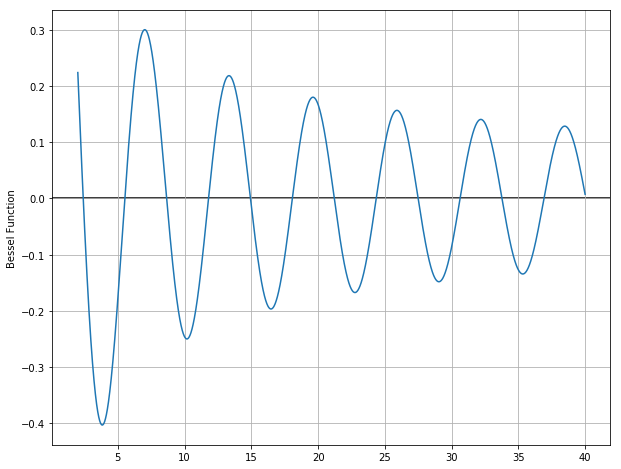

In [8]:
from mpmath import besselj
import matplotlib.pyplot as plt

j0 = lambda x: besselj(0,x)

x = np.arange(2, 40, 0.001)
y = list(map(j0, x))

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Bessel Function')
plt.plot(x, y, zorder=2)
plt.grid(True)
plt.axhline(0, color='black', zorder=1)
plt.show()

从图中可以估测前 10 个零点的存在区间，在这些区间上运行 `zeroin` 算法得到准确零点：

In [9]:
intervals = [
    (2, 4),
    (5, 7),
    (7, 9),
    (11, 13),
    (14, 15),
    (17, 19),
    (21, 22),
    (23.5, 25),
    (27, 28),
    (30, 31),
]

zeros = []

for interval in intervals:
    zeros.append(zeroin(j0, *interval))

zeroin method took 6 steps to solve the equation: 2.4048
zeroin method took 5 steps to solve the equation: 5.5201
zeroin method took 5 steps to solve the equation: 8.6537
zeroin method took 5 steps to solve the equation: 11.7915
zeroin method took 4 steps to solve the equation: 14.9309
zeroin method took 4 steps to solve the equation: 18.0711
zeroin method took 4 steps to solve the equation: 21.2116
zeroin method took 4 steps to solve the equation: 24.3525
zeroin method took 4 steps to solve the equation: 27.4935
zeroin method took 4 steps to solve the equation: 30.6346


将这些点绘制在函数图上验证：

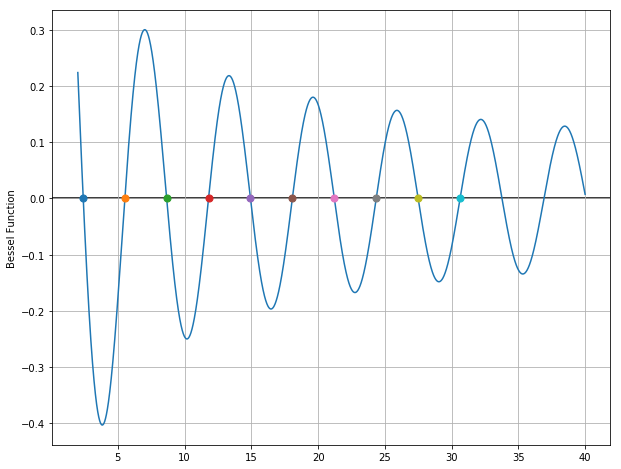

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Bessel Function')
plt.plot(x, y, zorder=2)
plt.grid(True)
plt.axhline(0, color='black', zorder=1)
for zero in zeros:
    plt.scatter(zero, 0, s=50, zorder=3)
plt.show()

可以看到，zeroin 算法正确地求出了该函数的前十个零点。

### 实验结论

通过本实验，我学习了函数零点迭代法 `zeroin` 的思想，实现了这一算法，并在第一类零阶 Bessel 函数上使用这一算法进行了零点的求解。这一算法是多种不同迭代法的综合，不需要导数地也能较快、较准确地收敛到函数零点，是一种通用、高效的算法。